In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
full_dataset = pd.DataFrame()
for i in np.arange(2013, 2023):
    if i == 2013:
        full_dataset = pd.read_csv(r"C:\Users\Octave\Documents\ERCOT_CSV\ERCOT_Prices_{0}.csv".format(i))
        continue
    full_dataset = pd.concat([full_dataset, pd.read_csv(r"C:\Users\Octave\Documents\ERCOT_CSV\ERCOT_Prices_{0}.csv".format(i))],
                             ignore_index=True)


C:\Users\Octave\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
full_dataset

,Delivery Date,Delivery Hour,Delivery Interval,Repeated Hour Flag,Settlement Point Name,Settlement Point Type,Settlement Point Price
0,01/01/2013,1,1,N,HB_BUSAVG,SH,21.71
1,01/01/2013,1,2,N,HB_BUSAVG,SH,21.64
2,01/01/2013,1,3,N,HB_BUSAVG,SH,21.80
3,01/01/2013,1,4,N,HB_BUSAVG,SH,21.51
4,01/01/2013,1,1,N,HB_HOUSTON,HU,21.71
...,...,...,...,...,...,...,...
7241357,04/02/2022,24,2,N,LZ_WEST,LZ,53.69
7241358,04/02/2022,24,3,N,LZ_WEST,LZEW,36.78
7241359,04/02/2022,24,3,N,LZ_WEST,LZ,36.78
7241360,04/02/2022,24,4,N,LZ_WEST,LZ,29.81


In [4]:
full_dataset['Settlement Point Type'].unique()

array(['SH', 'HU', 'AH', 'LZ', 'LZEW'], dtype=object)

In [5]:
full_dataset['delivery_datetime'] = pd.to_datetime(full_dataset['Delivery Date'])
full_dataset['delivery_datetime'] = full_dataset['delivery_datetime'] 
full_dataset['delivery_hour_delta'] = pd.to_timedelta(full_dataset['Delivery Hour']-1, unit = 'h') 
full_dataset['delivery_min_delta'] = pd.to_timedelta(15*full_dataset['Delivery Interval'], unit = 'm')
full_dataset['delivery_datetime'] = full_dataset['delivery_datetime'] + full_dataset['delivery_hour_delta'] + full_dataset['delivery_min_delta']
full_dataset['delivery_year'] = full_dataset['delivery_datetime'].dt.year
# full_dataset.drop(['Delivery Hour', 'delivery_hour_delta', 'delivery_min_delta'], axis=1, inplace=True)

In [6]:
full_dataset.index = full_dataset['delivery_datetime']

In [7]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7241362 entries, 2013-01-01 00:15:00 to 2022-04-03 00:00:00
Data columns (total 11 columns):
 #   Column                  Dtype          
---  ------                  -----          
 0   Delivery Date           object         
 1   Delivery Hour           int64          
 2   Delivery Interval       int64          
 3   Repeated Hour Flag      object         
 4   Settlement Point Name   object         
 5   Settlement Point Type   object         
 6   Settlement Point Price  object         
 7   delivery_datetime       datetime64[ns] 
 8   delivery_hour_delta     timedelta64[ns]
 9   delivery_min_delta      timedelta64[ns]
 10  delivery_year           int64          
dtypes: datetime64[ns](1), int64(3), object(5), timedelta64[ns](2)
memory usage: 663.0+ MB


In [8]:
full_dataset

,Delivery Date,Delivery Hour,Delivery Interval,Repeated Hour Flag,Settlement Point Name,Settlement Point Type,Settlement Point Price,delivery_datetime,delivery_hour_delta,delivery_min_delta,delivery_year
delivery_datetime,,,,,,,,,,,
2013-01-01 00:15:00,01/01/2013,1,1,N,HB_BUSAVG,SH,21.71,2013-01-01 00:15:00,00:00:00,00:15:00,2013
2013-01-01 00:30:00,01/01/2013,1,2,N,HB_BUSAVG,SH,21.64,2013-01-01 00:30:00,00:00:00,00:30:00,2013
2013-01-01 00:45:00,01/01/2013,1,3,N,HB_BUSAVG,SH,21.80,2013-01-01 00:45:00,00:00:00,00:45:00,2013
2013-01-01 01:00:00,01/01/2013,1,4,N,HB_BUSAVG,SH,21.51,2013-01-01 01:00:00,00:00:00,01:00:00,2013
2013-01-01 00:15:00,01/01/2013,1,1,N,HB_HOUSTON,HU,21.71,2013-01-01 00:15:00,00:00:00,00:15:00,2013
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-02 23:30:00,04/02/2022,24,2,N,LZ_WEST,LZ,53.69,2022-04-02 23:30:00,23:00:00,00:30:00,2022
2022-04-02 23:45:00,04/02/2022,24,3,N,LZ_WEST,LZEW,36.78,2022-04-02 23:45:00,23:00:00,00:45:00,2022
2022-04-02 23:45:00,04/02/2022,24,3,N,LZ_WEST,LZ,36.78,2022-04-02 23:45:00,23:00:00,00:45:00,2022


In [9]:
full_dataset.drop(columns=["Delivery Date", "Delivery Hour", "Repeated Hour Flag", "delivery_datetime", 
                           "Delivery Interval", "delivery_hour_delta", "delivery_min_delta", "delivery_year"])

,Settlement Point Name,Settlement Point Type,Settlement Point Price
delivery_datetime,,,
2013-01-01 00:15:00,HB_BUSAVG,SH,21.71
2013-01-01 00:30:00,HB_BUSAVG,SH,21.64
2013-01-01 00:45:00,HB_BUSAVG,SH,21.80
2013-01-01 01:00:00,HB_BUSAVG,SH,21.51
2013-01-01 00:15:00,HB_HOUSTON,HU,21.71
...,...,...,...
2022-04-02 23:30:00,LZ_WEST,LZ,53.69
2022-04-02 23:45:00,LZ_WEST,LZEW,36.78
2022-04-02 23:45:00,LZ_WEST,LZ,36.78


In [10]:
full_dataset.drop(columns=["Delivery Date", "Delivery Hour", "Repeated Hour Flag", "delivery_datetime", 
                           "Delivery Interval", "delivery_hour_delta", "delivery_min_delta", "delivery_year"], inplace=True)

In [11]:
full_dataset

,Settlement Point Name,Settlement Point Type,Settlement Point Price
delivery_datetime,,,
2013-01-01 00:15:00,HB_BUSAVG,SH,21.71
2013-01-01 00:30:00,HB_BUSAVG,SH,21.64
2013-01-01 00:45:00,HB_BUSAVG,SH,21.80
2013-01-01 01:00:00,HB_BUSAVG,SH,21.51
2013-01-01 00:15:00,HB_HOUSTON,HU,21.71
...,...,...,...
2022-04-02 23:30:00,LZ_WEST,LZ,53.69
2022-04-02 23:45:00,LZ_WEST,LZEW,36.78
2022-04-02 23:45:00,LZ_WEST,LZ,36.78


In [12]:
groupd = full_dataset.groupby('Settlement Point Name', as_index=False).agg({'Settlement Point Type': lambda x: len(x.unique())})
groupd

,Settlement Point Name,Settlement Point Type
0,HB_BUSAVG,1
1,HB_HOUSTON,1
2,HB_HUBAVG,1
3,HB_NORTH,1
4,HB_PAN,1
5,HB_SOUTH,1
6,HB_WEST,1
7,LZ_AEN,2
8,LZ_CPS,2
9,LZ_HOUSTON,2


In [13]:
full_dataset['name_type'] = full_dataset['Settlement Point Name'] + "_" + full_dataset['Settlement Point Type']

In [14]:
full_dataset['Settlement Point Price'] = full_dataset["Settlement Point Price"].str.replace(",", "").astype(float)

In [15]:
full_dataset["name_type"].unique()

array(['HB_BUSAVG_SH', 'HB_HOUSTON_HU', 'HB_HUBAVG_AH', 'HB_NORTH_HU',
       'HB_SOUTH_HU', 'HB_WEST_HU', 'LZ_AEN_LZ', 'LZ_AEN_LZEW',
       'LZ_CPS_LZ', 'LZ_CPS_LZEW', 'LZ_HOUSTON_LZ', 'LZ_HOUSTON_LZEW',
       'LZ_LCRA_LZ', 'LZ_LCRA_LZEW', 'LZ_NORTH_LZ', 'LZ_NORTH_LZEW',
       'LZ_RAYBN_LZ', 'LZ_RAYBN_LZEW', 'LZ_SOUTH_LZ', 'LZ_SOUTH_LZEW',
       'LZ_WEST_LZ', 'LZ_WEST_LZEW', 'HB_PAN_HU'], dtype=object)

(0.0, 500.0)

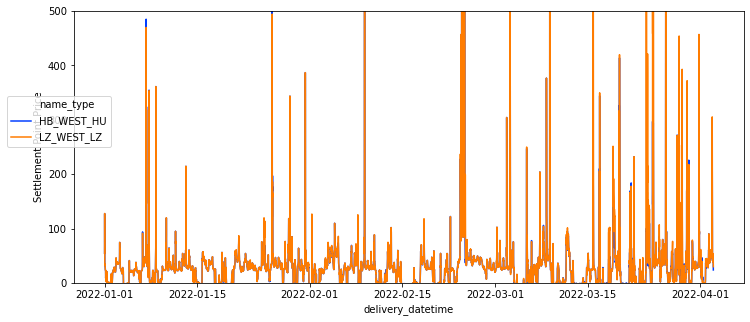

In [16]:
plt.figure(figsize= (12, 5))
sns.lineplot(x = 'delivery_datetime', y = 'Settlement Point Price', hue = "name_type", 
             data = full_dataset[(full_dataset.index.year >= 2022) &
                                 ((full_dataset['name_type'] == "LZ_WEST_LZ") |
                                 (full_dataset['name_type'] == 'HB_WEST_HU'))].reset_index(), palette = 'bright')
plt.legend(loc=(-.1, .5))
plt.ylim((0, 500))

In [29]:
# cut_dataset = full_dataset[(full_dataset['Settlement Point Type'] != 'LZEW') &
#                            (full_dataset.index.year >= 2014)].drop(['name_type'], axis=1)
cut_dataset = full_dataset[(full_dataset['Settlement Point Type'] != 'LZEW') &
                           (full_dataset.index.year >= 2013)]\
                                    .drop(['name_type', 'Settlement Point Type'], axis=1)

In [30]:
no_hubs = cut_dataset[~(cut_dataset['Settlement Point Name'].str.match('HB'))]

In [33]:
no_hubs

,Settlement Point Name,Settlement Point Price
delivery_datetime,,
2013-01-01 00:15:00,LZ_AEN,21.71
2013-01-01 00:30:00,LZ_AEN,21.64
2013-01-01 00:45:00,LZ_AEN,21.80
2013-01-01 01:00:00,LZ_AEN,21.51
2013-01-01 00:15:00,LZ_CPS,21.71
...,...,...
2022-04-03 00:00:00,LZ_SOUTH,24.49
2022-04-02 23:15:00,LZ_WEST,50.15
2022-04-02 23:30:00,LZ_WEST,53.69


In [32]:
no_hubs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2595032 entries, 2013-01-01 00:15:00 to 2022-04-03 00:00:00
Data columns (total 2 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Settlement Point Name   object 
 1   Settlement Point Price  float64
dtypes: float64(1), object(1)
memory usage: 59.4+ MB


In [20]:
no_hubs.to_csv("C:\\Users\\Octave\\MERN-Tutorial\\EDA\\Data\\"+"Historical_price_data.csv")

In [21]:
LZW_dataset = full_dataset[(full_dataset["Settlement Point Name"] == "LZ_WEST") &
                           (full_dataset['Settlement Point Type'] == 'LZ')]

In [22]:
LZW_dataset

,Settlement Point Name,Settlement Point Type,Settlement Point Price,name_type
delivery_datetime,,,,
2013-01-01 00:15:00,LZ_WEST,LZ,21.71,LZ_WEST_LZ
2013-01-01 00:30:00,LZ_WEST,LZ,21.64,LZ_WEST_LZ
2013-01-01 00:45:00,LZ_WEST,LZ,21.80,LZ_WEST_LZ
2013-01-01 01:00:00,LZ_WEST,LZ,21.51,LZ_WEST_LZ
2013-01-01 01:15:00,LZ_WEST,LZ,21.26,LZ_WEST_LZ
...,...,...,...,...
2022-04-02 23:00:00,LZ_WEST,LZ,49.12,LZ_WEST_LZ
2022-04-02 23:15:00,LZ_WEST,LZ,50.15,LZ_WEST_LZ
2022-04-02 23:30:00,LZ_WEST,LZ,53.69,LZ_WEST_LZ
